# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Note:** This notebook was AI-generated and has not been fully verified. Researchers should exercise caution when interpreting the code or results and are encouraged to verify findings independently.

## Dandiset Overview

This Dandiset ([DANDI:001174/0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218)) contains calcium imaging data recorded from the supplementary motor area (SMA) and primary motor area (M1) of four rhesus macaques. The study utilized one-photon calcium imaging with miniature microscopes to examine activity patterns of projection neurons in deep layers of these motor cortices. The animals were either at rest or engaged in an arm reaching task. The data includes raw calcium imaging data, processed fluorescence traces, and spatial footprints (masks) of identified neurons.

**Keywords:** One-photon calcium imaging, non-human primates, microendoscope, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens

**Contributors:** Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; Nassi, Jonathan J.; Yu, Waylin; Downer, Joshua D. ; Wichmann, Thomas; Aligning Science Across Parkinson's; NIH ORIP

**Description:** The study aims to understand motor control in non-human primates by examining activity patterns of neurons in SMA and M1 using in vivo calcium imaging. The data captures neuronal activity during rest and an arm reaching task to assess activity patterns, synchronicity, and sequential activation.

## Notebook Summary

This notebook will guide you through accessing and exploring the data within Dandiset 001174. We will demonstrate how to:

1.  Connect to the DANDI archive and list the assets in the Dandiset.
2.  Load a specific NWB file from the Dandiset.
3.  Inspect the structure and metadata of the loaded NWB file.
4.  Visualize key data modalities, including raw calcium imaging frames, fluorescence traces, and spatial footprints of identified neurons.

## Required Packages

To run this notebook, you will need the following Python packages installed:

*   `dandi`
*   `pynwb`
*   `h5py`
*   `remfile`
*   `numpy`
*   `matplotlib`
*   `seaborn`
*   `itertools`

## Loading the Dandiset and Listing Assets

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


## Loading an NWB File

This Dandiset contains multiple NWB files. For this exploration, we will focus on the file located at `sub-F/sub-F_ses-20240213T110430_ophys.nwb`. We will load this file directly from the Dandi archive using its asset URL.

In [2]:
import pynwb
import h5py
import remfile

# Define the URL for the selected NWB file
# This URL is constructed using the asset ID obtained from the dandiset.get_assets() output
nwb_file_url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"

# Load the NWB file
# We use remfile to access the remote file and h5py to interface with the HDF5 structure
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the loaded NWB file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")

# Note: Displaying the entire nwb object can produce excessive output,
# so we only print selected metadata fields.

NWB file identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
Session description: Calcium imaging in SMA during the spontaneous condition
Session start time: 2024-02-13 11:04:30.267000+00:00
Subject ID: F
Subject species: Macaca mulatta


## Summarizing NWB File Contents

The loaded NWB file (`sub-F/sub-F_ses-20240213T110430_ophys.nwb`) contains various data interfaces related to optical physiology (ophys). Key sections and their contents include:

*   **acquisition**: Contains raw acquired data.
   *   `OnePhotonSeries`: The raw one-photon calcium imaging data.
       *   Shape: (time, height, width) - (6026, 1280, 800)
       *   Unit: fluorescence
       *   Rate: 10.0 Hz
*   **processing**: Contains processed data modules.
   *   `ophys`: Optical physiology processing module.
       *   `EventAmplitude`: Amplitude of neural events associated with spatial footprints.
           *   Shape: (time, ROIs) - (6026, 6)
           *   Unit: fluorescence
           *   Rate: 10.0037 Hz (approximately)
       *   `Fluorescence`: Fluorescence data associated with spatial footprints.
           *   Shape: (time, ROIs) - (6026, 6)
           *   Unit: fluorescence
           *   Rate: 10.0 Hz
       *   `ImageSegmentation`: Stores the spatial footprints (masks) of identified ROIs.
           *   `PlaneSegmentation`: Contains the image masks.
              *   `image_mask`: Image masks for each ROI.
*   **devices**: Information about recording devices (e.g., Miniscope).
*   **imaging_planes**: Details about the imaged plane.
*   **subject**: Information about the experimental subject.

You can explore this NWB file directly on Neurosift by following this link:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/&dandisetId=001174&dandisetVersion=0.250331.2218](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/&dandisetId=001174&dandisetVersion=0.250331.2218)

## Visualizing Raw Calcium Imaging Data

Let's visualize a single frame from the `OnePhotonSeries` data to get a sense of the raw imaging field of view. Because the full dataset is large, we will only load and plot the first frame.

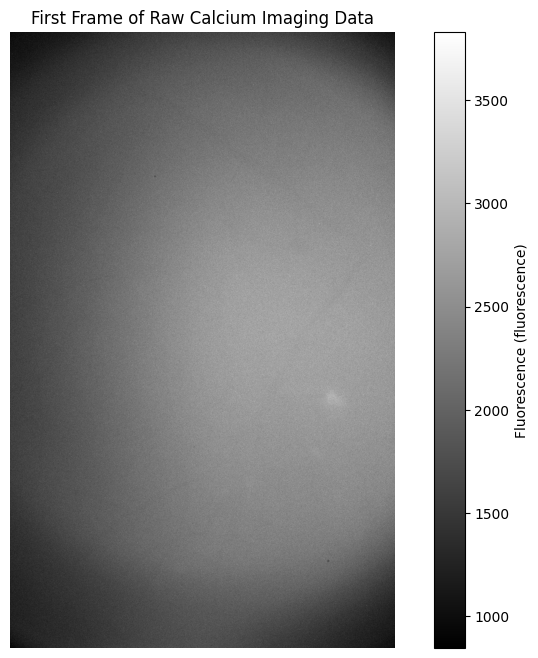

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Access the OnePhotonSeries data
one_photon_series = nwb.acquisition["OnePhotonSeries"]

# Load the first frame of the raw imaging data
# Use array slicing to load only the first frame (time index 0)
first_frame = one_photon_series.data[0, :, :]

# Plot the frame
plt.figure(figsize=(10, 8))
plt.imshow(first_frame, cmap='gray')
plt.title('First Frame of Raw Calcium Imaging Data')
plt.xlabel('Width')
plt.ylabel('Height')
plt.colorbar(label=f'Fluorescence ({one_photon_series.unit})')
plt.axis('off') # Hide axes for image display
plt.show()

This frame shows the raw fluorescence signal across the imaged plane. Brighter spots may correspond to neurons expressing the calcium indicator.

## Visualizing Fluorescence Traces

The `Fluorescence` data interface provides the processed fluorescence traces for each identified ROI. These traces represent the change in fluorescence over time, reflecting neuronal activity. Let's plot the traces for a few ROIs. To keep the plot manageable, we will plot the first 5 ROIs for a limited time duration (e.g., the first 100 seconds).

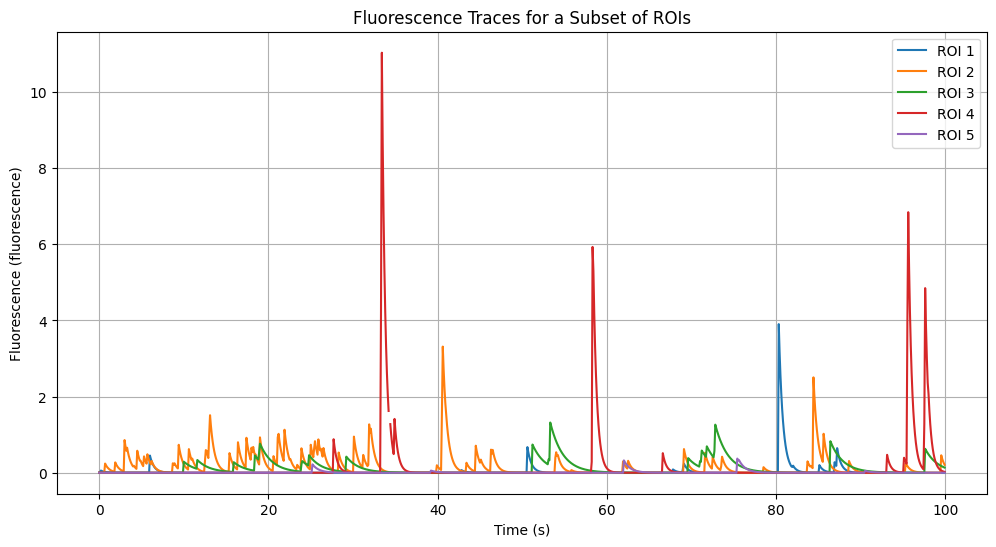

In [4]:
import seaborn as sns

# Access the Fluorescence data and RoiResponseSeries
fluorescence_module = nwb.processing["ophys"]["Fluorescence"]
roi_response_series = fluorescence_module.roi_response_series["RoiResponseSeries"]

# Define the number of ROIs and time points to plot
num_rois_to_plot = 5
num_time_points_to_plot = 1000 # Number of time points corresponds to 100 seconds at 10 Hz

# Load a subset of the fluorescence traces
# Slice the data by time points first, then by ROIs
traces_subset = roi_response_series.data[:num_time_points_to_plot, :num_rois_to_plot]

# Get the corresponding timestamps
# Calculate timestamps based on starting time and rate
starting_time = roi_response_series.starting_time
rate = roi_response_series.rate
timestamps_subset = starting_time + np.arange(num_time_points_to_plot) / rate

# Plot the traces using seaborn theme for better aesthetics
# sns.set_theme() # Apply seaborn theme
plt.figure(figsize=(12, 6))
for i in range(num_rois_to_plot):
    # When plotting, use the column index which corresponds to the ROI.
    # For display purposes in the legend, we can use a 1-based index.
    plt.plot(timestamps_subset, traces_subset[:, i], label=f'ROI {i+1}')

plt.title('Fluorescence Traces for a Subset of ROIs')
plt.xlabel('Time (s)')
plt.ylabel(f'Fluorescence ({roi_response_series.unit})')
plt.legend()
plt.grid(True)
plt.show()

These traces show the dynamics of calcium fluorescence in individual ROIs, likely reflecting neuronal firing activity. We can observe distinct calcium transients indicating periods of increased activity.

## Visualizing Image Masks

The `ImageSegmentation` data interface stores the spatial footprints or masks of the identified ROIs. Visualizing these masks helps understand the location and shape of the segmented neurons within the imaging plane. We will load all the image masks and display them superimposed on each other.

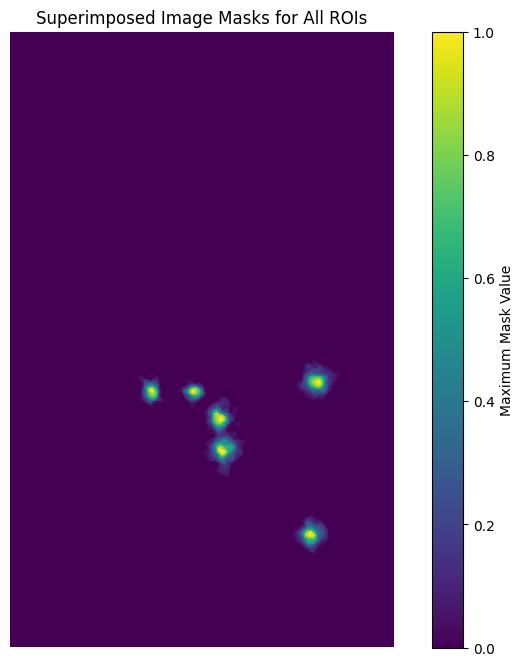

In [5]:
# Access the PlaneSegmentation and image_mask data
image_segmentation_module = nwb.processing["ophys"]["ImageSegmentation"]
plane_segmentation = image_segmentation_module.plane_segmentations["PlaneSegmentation"]

# Load all image masks
# The image_mask data is a VectorData object within the PlaneSegmentation table
# Access the data array using [:]
image_masks_all = plane_segmentation.image_mask[:]

# The shape of image_masks_all should be (n_rois, height, width)
# If it's flattened, reshape it.
# We know from the nwb-file-info that the OnePhotonSeries data has shape (time, 1280, 800)
# Assuming masks have the same spatial dimensions
n_rois = image_masks_all.shape[0]
# Get the height and width from the ImagingPlane associated with PlaneSegmentation
# Accessing shape from OnePhotonSeries is more direct from nwb-file-info output
if image_masks_all.ndim == 2:
     height, width = nwb.acquisition["OnePhotonSeries"].data.shape[1:]
     image_masks_all = image_masks_all.reshape(n_rois, height, width)


# Superimpose the masks by taking the maximum value at each pixel across all masks
# This shows the combined spatial coverage of all detected ROIs
superimposed_mask = np.max(image_masks_all, axis=0)

# Plot the superimposed masks as a heatmap
plt.figure(figsize=(10, 8))
# Use a suitable colormap for the heatmap
plt.imshow(superimposed_mask, cmap='viridis')
plt.title('Superimposed Image Masks for All ROIs')
plt.xlabel('Width')
plt.ylabel('Height')
plt.colorbar(label='Maximum Mask Value')
plt.axis('off') # Hide axes for image display
plt.show()

This heatmap displays the spatial location and extent of all identified ROIs within the imaging plane. Each bright region represents the area covered by one or more detected neurons.

## Summary and Future Directions

This notebook provided a basic introduction to exploring Dandiset 001174. We demonstrated how to connect to the Dandi archive, load an NWB file, inspect its contents, and visualize raw imaging data, fluorescence traces, and image masks.

Possible future directions for analysis include:

*   Analyzing the relationship between neuronal activity patterns and the arm reaching task.
*   Investigating synchronous activity or sequential activation patterns between different neurons/ROIs.
*   Comparing activity patterns across different recording sessions or subjects.
*   Performing further processing or analysis on the fluorescence traces (e.g., deconvolution or spike inference).
*   Mapping the location of ROIs to anatomical regions if such information is available.

This notebook serves as a starting point for researchers to delve deeper into this rich calcium imaging dataset.

In [6]:
# Close the NWB file when done
io.close()